# Q. 
number of student = 100
number of subject = 10
passing criteria = 33 in all subjects
numbers lies in the range [5,95]

input layer = 10
neurons in hidden layer = 5
number of hidden layer = 3
output layer = 1


In [150]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [151]:
# x_train = np.zeros((100,10))
y_train = np.zeros((100,1))

n_x = 10
n_h = 5
n_y = 1

In [152]:
# print(y_train.shape)
# np.append(y_train,12)
# y_train[1][0] = 5
# print(y_train)

In [153]:
np.random.seed(100)
x1 = np.random.randint(40, 95, size=(55,10), dtype=int)
x2 = np.random.randint(5, 95, size= (45,10), dtype=int)
x_train = np.concatenate((x1,x2))
# print(x_train.shape)
np.random.shuffle(x_train)
# print(x_train)

In [154]:
for i in range(100):
    value = 1
    for j in range(10):
        if x_train[i][j] < 33:
            value = 0
            break
    y_train[i][0] = value

print(y_train.shape)
p = 0
f = 0
for i in y_train:
    if i == 0:
        f += 1
    else:
        p += 1
print("pass: ",p, "fail:",f)

(100, 1)
pass:  57 fail: 43


In [155]:
def intialWeights():
    w1 = np.random.randn(n_x,n_h) * 0.001
    w2 = np.random.randn(n_h,n_h) * 0.001
    w3 = np.random.randn(n_h,n_h) * 0.001
    w4 = np.random.randn(n_h,n_y) * 0.001

    b1 = np.zeros((1,n_h))
    b2 = np.zeros((1,n_h))
    b3 = np.zeros((1,n_h))
    b4 = np.zeros((1,n_y))

    params = {
        "w1": w1,
        "w2": w2,
        "w3": w3,
        "w4": w4,
        "b1": b1,
        "b2": b2,
        "b3": b3,
        "b4": b4
    }
    return params


In [156]:
def sig(x):
    return 1/(1+np.exp(-x))
def der_sig(x):
    return x*(1-x)

def tanh(x):
    return np.tanh(x)
def der_tanh(x):
    return 1 - (np.tanh(x)**2)

In [157]:
def forwardPropagation(x,params):
    w1 = params["w1"]
    w2 = params["w2"]
    b1 = params["b1"]
    b2 = params["b2"]
    w3 = params["w3"]
    b3 = params["b3"]
    w4 = params["w4"]
    b4 = params["b4"]

    z1 = np.dot(x,w1) + b1
    a1 = tanh(z1)

    z2 = np.dot(a1,w2) + b2
    a2 = tanh(z2)

    z3 = np.dot(a2,w3) + b3
    a3 = tanh(z3)

    z4 = np.dot(a3,w4) + b4
    a4 = tanh(z4)

    forward = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2,
        "z3": z3,
        "a3": a3,
        "z4": z4,
        "a4": a4
    }
    return forward

In [158]:
def costFunction(y,a4):
    return np.mean((y-a4)**2)

In [159]:
def backPropagation(forward, weights, x, y, learningRate):
    error = y - forward["a4"]
    dError = error * der_tanh(forward["a4"])

    h3 = np.dot(dError,weights["w4"].T)
    dh3 = h3 * der_tanh(forward["a3"])

    h2 = np.dot(dh3,weights["w3"].T)
    dh2 = h2 * der_tanh(forward["a2"])

    h1 = np.dot(dh2,weights["w2"])
    dh1 = h1 * der_tanh(forward["a1"])

    weights["w4"] += np.dot(forward["a3"].T, dError) * learningRate
    weights["b4"] += np.sum(dError,axis=0,keepdims=True) * learningRate

    weights["w3"] += np.dot(forward["a2"].T, dh3) * learningRate
    weights["b3"] += np.sum(dh3,axis=0,keepdims=True) * learningRate

    weights["w2"] += np.dot(forward["a1"].T, dh2) * learningRate
    weights["b2"] += np.sum(dh2,axis=0,keepdims=True) * learningRate

    weights["w1"] += np.dot(x.T, dError) * learningRate
    weights["b1"] += np.sum(dh1, axis=0, keepdims= True) * learningRate
    
    return weights

In [160]:
def model(x, y,learningRate,epochs):
    weights = intialWeights()
    cost_history = []
    for i in range(epochs):
        forward = forwardPropagation(x,weights)
        loss = costFunction(y,forward["a4"])
        cost_history.append(loss)
        weights = backPropagation(forward, weights, x, y, learningRate)
        if i % 10 == 0:
            print(f"Epoch {i+1}, Loss: {loss}")
    
    return weights, cost_history

In [161]:
# trainging start
learningRate = 0.01
epochs = 100
parameters, cost_history = model(x_train, y_train, learningRate,epochs)

Epoch 1, Loss: 0.5700000001639185
Epoch 11, Loss: 0.24510000824943165
Epoch 21, Loss: 0.24510000000000928
Epoch 31, Loss: 0.24509999999999998
Epoch 41, Loss: 0.24510000000000004
Epoch 51, Loss: 0.24509999999999998
Epoch 61, Loss: 0.24509999999999998
Epoch 71, Loss: 0.24509999999999998
Epoch 81, Loss: 0.24509999999999998
Epoch 91, Loss: 0.24509999999999998


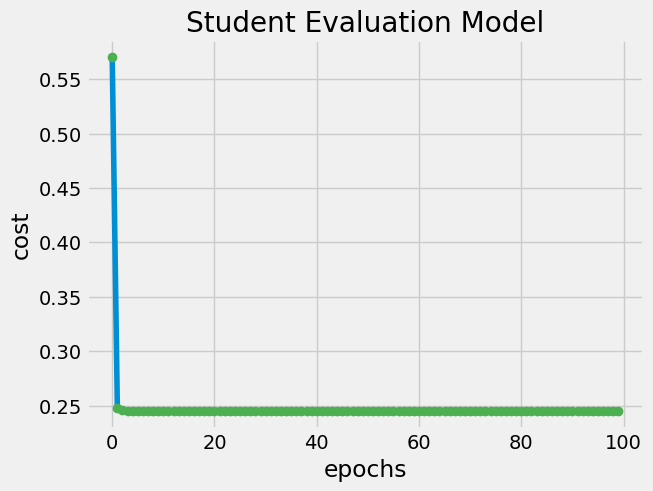

In [162]:
t = np.arange(0,epochs)
plt.plot(t,cost_history,marker = 'o', mec = '#4CAF50', mfc = '#4CAF50')
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("Student Evaluation Model")
plt.show()

In [163]:
def findAccuracy(y,a4):
    count = 0
    testing = np.zeros((100,1))
    for i in range(a4.shape[1]):
        if a4[i][0] > 0.5:
            testing[i][0] = 1
        else:
            testing[i][0] = 0

    print(testing)
    for i,j in zip(y,testing):
        if i==j:
            count += 1
    total = y.shape[1]
    accuracy = count/total
    return accuracy

In [164]:
forward_test = forwardPropagation(x_train,parameters)
print("Accuray :", findAccuracy(y_train,forward_test["a4"]))
# print(forward_test["a4"].shape)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Accuray : 42.0


In [165]:
x_test = [50,60,40,35,56,36,50,80,60,40]
y_test = 1
forward_test = forwardPropagation(x_test,parameters)
print("y_test: ",y_test)
print("predicted value: ",(forward_test["a4"]>0.5), forward_test["a4"])

y_test:  1
predicted value:  [[ True]] [[0.57]]


In [166]:
print(parameters)

{'w1': array([[368.5527483 , 368.55356813, 368.5540394 , 368.55425416,
        368.55328356],
       [261.99881206, 261.99868001, 261.99838541, 261.99748139,
        261.99524022],
       [312.59878428, 312.59874228, 312.59737493, 312.59976737,
        312.59898921],
       [480.20419124, 480.20640581, 480.20633104, 480.2067167 ,
        480.20437432],
       [296.9472601 , 296.94587899, 296.94384688, 296.94619335,
        296.94640076],
       [413.79615991, 413.79430634, 413.79542563, 413.79354035,
        413.79488911],
       [527.62095689, 527.62319845, 527.62085715, 527.62343899,
        527.62199486],
       [368.46214229, 368.46182276, 368.46370845, 368.46191776,
        368.46312487],
       [328.00265768, 328.00335611, 328.00320714, 328.00255904,
        328.00218646],
       [304.46661752, 304.46837644, 304.46807815, 304.46976592,
        304.46806928]]), 'w2': array([[-0.0017652 ,  0.0014476 , -0.00114179,  0.0007464 , -0.00046902],
       [ 0.00078738, -0.00018198, -0.0010